In [79]:
import numpy as np
import therpy as tp
import timeit
import numba
from numba import float64
import matplotlib.pyplot as plt
%matplotlib inline

# Various Scenarios for Speed Improvement

### Complex Sqrt ==> 20x speed up

In [105]:
@numba.vectorize(nopython=True)
def sqrt_numba(x):
    return 0j + np.sqrt(x) if x >= 0 else 1j + np.sqrt(-x)

@np.vectorize
def sqrt_numpy(x):
    return 0j + np.sqrt(x) if x >= 0 else 1j + np.sqrt(-x)

In [42]:
x = np.random.uniform(-1,1,1000000)
y1 = sqrt_numba(x)
x = np.random.uniform(-1,1,1000000)
y2 = sqrt_numpy(x)

In [43]:
x = np.random.uniform(-1,1,1000000)
%timeit sqrt_numba(x)
x = np.random.uniform(-1,1,1000000)
%timeit sqrt_numpy(x)

100 loops, best of 3: 5.05 ms per loop
1 loop, best of 3: 911 ms per loop


### 2D Interpolations ==> No Difference

In [44]:
from scipy.interpolate import LinearNDInterpolator

In [64]:
x, y = np.linspace(-10,10,101), np.linspace(-10,10,101)
x, y = np.meshgrid(x, y)
s = 8
z = np.exp(- (x)**2/(2*s**2) - (y)**2/(2*s**2))

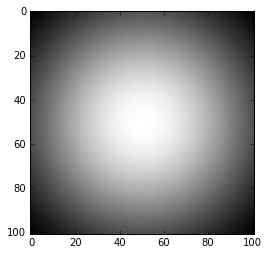

In [65]:
plt.imshow(z, interpolation='nearest',cmap='gray')

In [69]:
interp = LinearNDInterpolator((x.flatten(), y.flatten()), z.flatten())

In [88]:
@numba.vectorize([float64(float64, float64)])
def evaluate_numba(x, y):
    return interp(x, y)

@np.vectorize
def evaluate_numpy(x, y):
    return interp(x, y)

In [102]:
x, y = np.random.uniform(-10,10,201), np.random.uniform(-10,10,201)
x, y = np.meshgrid(x, y)
z1 = evaluate_numba(x,y)
z2 = evaluate_numpy(x,y)

In [103]:
%timeit evaluate_numba(x,y)
%timeit evaluate_numpy(x,y)

1 loop, best of 3: 1.1 s per loop
1 loop, best of 3: 1.2 s per loop
